<a href="https://colab.research.google.com/github/pvitorinosantos/soulcode/blob/main/Projeto_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 03 - Case Airbnb

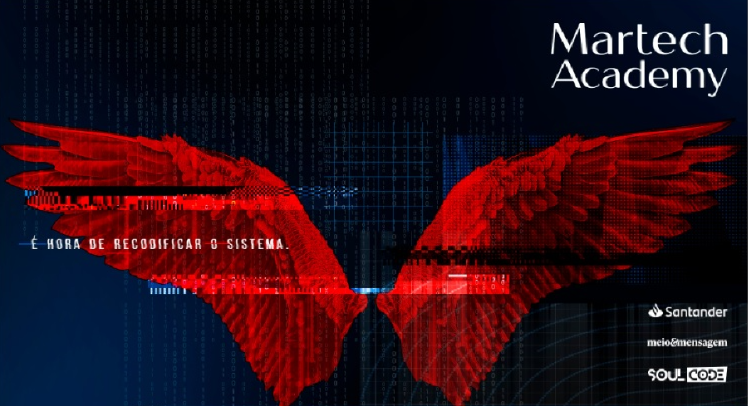

# Autor
Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Data de entrega: 10 de março de 2023

Professora: Franciane Rodrigues

Aluno: Paulo Vitorino dos Santos

# Sobre os Dados


Este conjunto de dados fornece uma visão abrangente dos preços do Airbnb em algumas das cidades europeias mais populares. Cada listagem é avaliada quanto a várias características, como tipos de quartos, classificações de limpeza e satisfação, número de quartos, distância do centro da cidade e muito mais, para obter uma compreensão detalhada dos preços do Airbnb tanto durante a semana quanto nos fins de semana. Utilizando métodos econométricos espaciais, analisamos e identificamos os determinantes dos preços do Airbnb nessas cidades.  

Fonte: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

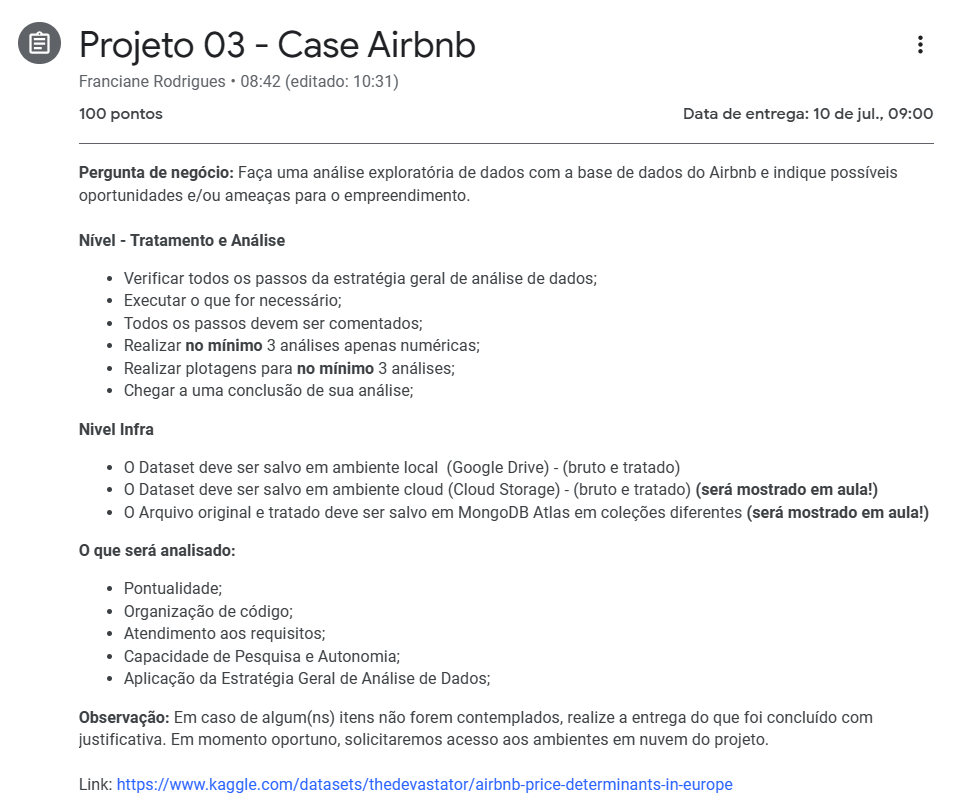

# **Requisitos**

* Cabeçalho;                                         
* Requisitos;
* Informações da base de dados com dicionários;
* Informar fontes de pesquisas (se houver);
* Problema de negócio: aplicação dos 5w;
* Instalação de pacotes/bibliotecas;
* ***Importar esses pacotes/bibliotecas:***

>* Pandas;
>* Numpy;
>* Matplotlib;
>* Pandera

* Extração

>* Google Drive (bruto);
>* GCP;
>* MongoDB;
>* Backup1;

* Pré-Análise;

>* Visualização dos dados;
>* Avaliação das possibilidades do que faremos;

* Transformação

>* Escolher as possíveis colunas importantes para a análise; o Verificar se há colunas iguais;
>* Verificação e tratamento de duplicadas;
>* Verificação e tratamento de valores nulos;
>* Verificação e tratamento de valores (ou observações) únicos; o Verificação e tratamento de inconsistência;
>* Tradução/Renomeação;
>  * Nome das colunas: minúsculo;
>  * Nome das categorias: maiúsculo;
>* Transformação de tipos adequados dos dados;
>  * Float;
>  * Int;
>  * String;
>  * Bool;
>  * Datetime;
>* Qualidade e integridade dos dados via Pandera;
>* Backup2;
>* Carregamento;
>  * Google Drive (tratado);
>  * GCP;
>  * MongoDB;
* Análise
>  * Busca ou Localização;
>  * Filtro;
>  * GroupBy;
>  * Combinando filtro e agrupamento;
>  * Resumo de estatística;
>     * Média
>     * Mediana
>     * Moda
>     * Quartis
>     * Desvio-padrão
>  * Visualização pelo Pandas e Matplotlib;
>     * **Barras**
>     * **Setores**
>     * **Boxplot**
>     * **Linhas**
>     * Dispersão
>     * Histograma


## Legenda de Dados

realSum: preço total  
room_type: tipo de quarto oferecido  
room_shared: se o quarto é compartilhado ou não   
room_private: se o quarto é privativo ou não   
person_capacity: número máximo de pessoas permitidas na propriedade  
host_is_superhost: se o host é ou não um superhost  
multi: tem vários quartos ou não   
biz: seja para uso comercial ou familiar  
cleanliness_rating: Classificação de limpeza  
guest_satisfaction_overall: satisfação geral do hóspede   
bedrooms: número de quartos  
dist: a distância do centro da cidade   
metro_dist: a distância da estação de metrô mais próxima (km)   
lng: Longitude   
lat: Latitude   

Neste projeto, após uma análise prévia, decidimos separar os valores necessários para responder às seguintes questões:

1. Qual o percentual de quartos oferecidos por tipo?
2. Quantos quartos são para uso familiar e comercial?
3. Qual a distribuição entre os quartos mais próximos do centro da cidade e do metrô?
4. Existe uma relação clara entre proximidade do centro ou do metrô e o tipo de imóvel?

# Instalações e Importações

In [ ]:
# Instalação para poder acessar GCP
# pip install gcsfs
import pandas as pd
import numpy as np
import os
import pandera as pa
import matplotlib.pyplot as plt
from google.colab import drive
from  google.cloud import storage

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Extração

In [ ]:
# Conexão com a pasta que contém o aquivo no Google Drive
#drive.mount('/content/drive')

In [ ]:
# Caminho do arquivo que está no Google Drive
#path = '/content/drive/MyDrive/Airbnb/airbnb-bruto.csv'

### **Google Cloud**

*   Documentação: https://cloud.google.com/docs/authentication?hl=pt-br

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/drive/MyDrive/cenipa/prof-douglas-c7336b4a5227.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('martech-arquivos')          # nome da bucket
bucket.blob('airbnb-bruto.csv')                         # nome do arquivo
path = 'gs://martech-arquivos/bruto/airbnb-bruto.csv'   # gsutil

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
# Visualizando os tipos de dados do dataframe ANTES de serem manipulados
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

# Transformação

In [ ]:
# Formatando a exibição em 2 casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.03,Private room,False,True,2.00,False,1,0,10.00,93.00,1,5.02,2.54,78.69,4.17,98.25,6.85,4.91,52.42
1,1,344.25,Private room,False,True,4.00,False,0,0,8.00,85.00,1,0.49,0.24,631.18,33.42,837.28,58.34,4.90,52.37
2,2,264.10,Private room,False,True,2.00,False,0,1,9.00,87.00,1,5.75,3.65,75.28,3.99,95.39,6.65,4.98,52.36
3,3,433.53,Private room,False,True,4.00,False,0,1,9.00,90.00,2,0.38,0.44,493.27,26.12,875.03,60.97,4.89,52.38
4,4,485.55,Private room,False,True,2.00,True,0,0,10.00,98.00,1,0.54,0.32,552.83,29.27,815.31,56.81,4.90,52.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.12,Entire home/apt,False,False,2.00,False,0,0,10.00,100.00,1,2.38,1.44,181.20,9.59,225.30,15.70,4.86,52.38
1099,1099,233.64,Private room,False,True,2.00,False,1,0,10.00,90.00,1,4.72,0.32,108.02,5.72,134.78,9.39,4.84,52.35
1100,1100,317.06,Private room,False,True,2.00,False,1,0,10.00,92.00,1,0.60,0.75,440.48,23.32,625.95,43.62,4.89,52.38
1101,1101,1812.86,Entire home/apt,False,False,4.00,False,0,0,8.00,84.00,5,1.94,0.39,257.95,13.66,336.59,23.45,4.91,52.36


### Tradução

In [ ]:
# Usando o inplace=True para forçar a mudança
df.rename(columns={'room_type':'tipo_quarto','room_shared':'compartilhado','room_private':'privado','biz':'comerc-familiar','person_capacity':'capacidade','bedrooms':'banheiros','cleanliness_rating':'nota_limpeza','host_is_superhost':'superhost','guest_satisfaction_overall':'satisfacao','dist':'distancia_centro','metro_dist':'distancia_metro','realSum':'preco_total','lat':'latitude','lng':'longitude'}, inplace = True)

In [ ]:
# Substituindo os valores da coluna tipo_quarto.
df.loc[df.tipo_quarto == 'Private room', ['tipo_quarto']] = 'QUARTO PRIVADO'
df.loc[df.tipo_quarto == 'Entire home/apt', ['tipo_quarto']] = 'DOMICÍLIO COMPLETO'
df.loc[df.tipo_quarto == 'Shared room', ['tipo_quarto']] = 'QUARTO COMPARTILHADO'

In [ ]:
# Usando o método replace para substituir os valores da coluna 'comerc-familiar' pelos labels "comercial" e "familiar"
df['comerc-familiar'] = df['comerc-familiar'].replace(0,'FAMILIAR')
df['comerc-familiar'] = df['comerc-familiar'].replace(1,'COMERCIAL')


In [ ]:
# Substituindo os valores da coluna compartilhado.
df.loc[df.compartilhado == False, ['compartilhado']] = 'FALSO'
df.loc[df.compartilhado == True, ['compartilhado']] = 'VERDADEIRO'

In [ ]:
# Substituindo os valores da coluna privado.
df.loc[df.privado == False, ['privado']] = 'FALSO'
df.loc[df.privado == True, ['privado']] = 'VERDADEIRO'

In [ ]:
df

,Unnamed: 0,preco_total,tipo_quarto,compartilhado,privado,capacidade,superhost,multi,comerc-familiar,nota_limpeza,satisfacao,banheiros,distancia_centro,distancia_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude
0,0,194.03,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,1,FAMILIAR,10.00,93.00,1,5.02,2.54,78.69,4.17,98.25,6.85,4.91,52.42
1,1,344.25,QUARTO PRIVADO,FALSO,VERDADEIRO,4.00,False,0,FAMILIAR,8.00,85.00,1,0.49,0.24,631.18,33.42,837.28,58.34,4.90,52.37
2,2,264.10,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,0,COMERCIAL,9.00,87.00,1,5.75,3.65,75.28,3.99,95.39,6.65,4.98,52.36
3,3,433.53,QUARTO PRIVADO,FALSO,VERDADEIRO,4.00,False,0,COMERCIAL,9.00,90.00,2,0.38,0.44,493.27,26.12,875.03,60.97,4.89,52.38
4,4,485.55,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,True,0,FAMILIAR,10.00,98.00,1,0.54,0.32,552.83,29.27,815.31,56.81,4.90,52.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.12,DOMICÍLIO COMPLETO,FALSO,FALSO,2.00,False,0,FAMILIAR,10.00,100.00,1,2.38,1.44,181.20,9.59,225.30,15.70,4.86,52.38
1099,1099,233.64,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,1,FAMILIAR,10.00,90.00,1,4.72,0.32,108.02,5.72,134.78,9.39,4.84,52.35
1100,1100,317.06,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,1,FAMILIAR,10.00,92.00,1,0.60,0.75,440.48,23.32,625.95,43.62,4.89,52.38
1101,1101,1812.86,DOMICÍLIO COMPLETO,FALSO,FALSO,4.00,False,0,FAMILIAR,8.00,84.00,5,1.94,0.39,257.95,13.66,336.59,23.45,4.91,52.36


In [ ]:
# Visualizando os tipos de dados APÓS a primeira manipulação (tradução dos títulos das colunas)
df.dtypes

Unnamed: 0            int64
preco_total         float64
tipo_quarto          object
compartilhado        object
privado              object
capacidade          float64
superhost              bool
multi                 int64
comerc-familiar      object
nota_limpeza        float64
satisfacao          float64
banheiros             int64
distancia_centro    float64
distancia_metro     float64
attr_index          float64
attr_index_norm     float64
rest_index          float64
rest_index_norm     float64
longitude           float64
latitude            float64
dtype: object

In [ ]:
# Outra forma de visualização do conjunto de dados, acrescentando a conferência de dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1103 non-null   int64  
 1   preco_total       1103 non-null   float64
 2   tipo_quarto       1103 non-null   object 
 3   compartilhado     1103 non-null   object 
 4   privado           1103 non-null   object 
 5   capacidade        1103 non-null   float64
 6   superhost         1103 non-null   bool   
 7   multi             1103 non-null   int64  
 8   comerc-familiar   1103 non-null   object 
 9   nota_limpeza      1103 non-null   float64
 10  satisfacao        1103 non-null   float64
 11  banheiros         1103 non-null   int64  
 12  distancia_centro  1103 non-null   float64
 13  distancia_metro   1103 non-null   float64
 14  attr_index        1103 non-null   float64
 15  attr_index_norm   1103 non-null   float64
 16  rest_index        1103 non-null   float64


## Colunas a serem usadas


In [ ]:
df

,Unnamed: 0,preco_total,tipo_quarto,compartilhado,privado,capacidade,superhost,multi,comerc-familiar,nota_limpeza,satisfacao,banheiros,distancia_centro,distancia_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude
0,0,194.03,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,1,FAMILIAR,10.00,93.00,1,5.02,2.54,78.69,4.17,98.25,6.85,4.91,52.42
1,1,344.25,QUARTO PRIVADO,FALSO,VERDADEIRO,4.00,False,0,FAMILIAR,8.00,85.00,1,0.49,0.24,631.18,33.42,837.28,58.34,4.90,52.37
2,2,264.10,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,0,COMERCIAL,9.00,87.00,1,5.75,3.65,75.28,3.99,95.39,6.65,4.98,52.36
3,3,433.53,QUARTO PRIVADO,FALSO,VERDADEIRO,4.00,False,0,COMERCIAL,9.00,90.00,2,0.38,0.44,493.27,26.12,875.03,60.97,4.89,52.38
4,4,485.55,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,True,0,FAMILIAR,10.00,98.00,1,0.54,0.32,552.83,29.27,815.31,56.81,4.90,52.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.12,DOMICÍLIO COMPLETO,FALSO,FALSO,2.00,False,0,FAMILIAR,10.00,100.00,1,2.38,1.44,181.20,9.59,225.30,15.70,4.86,52.38
1099,1099,233.64,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,1,FAMILIAR,10.00,90.00,1,4.72,0.32,108.02,5.72,134.78,9.39,4.84,52.35
1100,1100,317.06,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,1,FAMILIAR,10.00,92.00,1,0.60,0.75,440.48,23.32,625.95,43.62,4.89,52.38
1101,1101,1812.86,DOMICÍLIO COMPLETO,FALSO,FALSO,4.00,False,0,FAMILIAR,8.00,84.00,5,1.94,0.39,257.95,13.66,336.59,23.45,4.91,52.36


**Colunas que serão utilizadas**:

    >   preço total,
    >   tipo de quarto,  
    >   satisfacao,
    >   compartilhado,
    >   comerc-familiar,
    >   capacidade,
    >   distancia centro,  
    >   distancia metro,  
    >   longitude,  
    >   latitude,   
   

## Backup

In [ ]:
# Criação do backup do dataframe
dfbackup = df.copy()

In [ ]:
#df_final.to_csv('/content/drive/MyDrive/Airbnb/airbnb-tratado.csv', index=False) # salva localmente

## Verificação

In [ ]:
#Criando um filtro para verificar se há algum quarto compartilhado e privado ao mesmo tempo
ftcompartilhado = df.compartilhado == True
ftprivado = df.privado == True

In [ ]:
# Localizando as linhas que correspondem ao filtro feito antes
df.loc[ftcompartilhado & ftprivado]

,Unnamed: 0,preco_total,tipo_quarto,compartilhado,privado,capacidade,superhost,multi,comerc-familiar,nota_limpeza,satisfacao,banheiros,distancia_centro,distancia_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude


## Normalização

### Tipagem

In [ ]:
# Usando o metodo unique() para verificar quais valores há na coluna 'tipo_quarto'
df['tipo_quarto'].unique()

array(['QUARTO PRIVADO', 'DOMICÍLIO COMPLETO', 'QUARTO COMPARTILHADO'],
      dtype=object)

In [ ]:
# Usando o metodo unique() para verificar quais valores há na coluna 'comerc-familiar'
df['comerc-familiar'].unique()

array(['FAMILIAR', 'COMERCIAL'], dtype=object)

In [ ]:
# Checando dados Nulos , ausentes , etc
df.isna().sum()

Unnamed: 0          0
preco_total         0
tipo_quarto         0
compartilhado       0
privado             0
capacidade          0
superhost           0
multi               0
comerc-familiar     0
nota_limpeza        0
satisfacao          0
banheiros           0
distancia_centro    0
distancia_metro     0
attr_index          0
attr_index_norm     0
rest_index          0
rest_index_norm     0
longitude           0
latitude            0
dtype: int64

In [ ]:
df

,Unnamed: 0,preco_total,tipo_quarto,compartilhado,privado,capacidade,superhost,multi,comerc-familiar,nota_limpeza,satisfacao,banheiros,distancia_centro,distancia_metro,attr_index,attr_index_norm,rest_index,rest_index_norm,longitude,latitude
0,0,194.03,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,1,FAMILIAR,10.00,93.00,1,5.02,2.54,78.69,4.17,98.25,6.85,4.91,52.42
1,1,344.25,QUARTO PRIVADO,FALSO,VERDADEIRO,4.00,False,0,FAMILIAR,8.00,85.00,1,0.49,0.24,631.18,33.42,837.28,58.34,4.90,52.37
2,2,264.10,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,0,COMERCIAL,9.00,87.00,1,5.75,3.65,75.28,3.99,95.39,6.65,4.98,52.36
3,3,433.53,QUARTO PRIVADO,FALSO,VERDADEIRO,4.00,False,0,COMERCIAL,9.00,90.00,2,0.38,0.44,493.27,26.12,875.03,60.97,4.89,52.38
4,4,485.55,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,True,0,FAMILIAR,10.00,98.00,1,0.54,0.32,552.83,29.27,815.31,56.81,4.90,52.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.12,DOMICÍLIO COMPLETO,FALSO,FALSO,2.00,False,0,FAMILIAR,10.00,100.00,1,2.38,1.44,181.20,9.59,225.30,15.70,4.86,52.38
1099,1099,233.64,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,1,FAMILIAR,10.00,90.00,1,4.72,0.32,108.02,5.72,134.78,9.39,4.84,52.35
1100,1100,317.06,QUARTO PRIVADO,FALSO,VERDADEIRO,2.00,False,1,FAMILIAR,10.00,92.00,1,0.60,0.75,440.48,23.32,625.95,43.62,4.89,52.38
1101,1101,1812.86,DOMICÍLIO COMPLETO,FALSO,FALSO,4.00,False,0,FAMILIAR,8.00,84.00,5,1.94,0.39,257.95,13.66,336.59,23.45,4.91,52.36


In [ ]:
# Verificando se o tipo foi alterado corretamente
df.dtypes

Unnamed: 0            int64
preco_total         float64
tipo_quarto          object
compartilhado        object
privado              object
capacidade          float64
superhost              bool
multi                 int64
comerc-familiar      object
nota_limpeza        float64
satisfacao          float64
banheiros             int64
distancia_centro    float64
distancia_metro     float64
attr_index          float64
attr_index_norm     float64
rest_index          float64
rest_index_norm     float64
longitude           float64
latitude            float64
dtype: object

### Criação de variáveis

In [ ]:
# Criando um novo dataframe e escolhendo quais colunas do dataframe original
# quero trazer para esse novo dataframe
df_final = df[['preco_total','tipo_quarto','satisfacao','compartilhado','comerc-familiar','capacidade','distancia_centro','distancia_metro','longitude','latitude']]

In [ ]:
df_final

,preco_total,tipo_quarto,satisfacao,compartilhado,comerc-familiar,capacidade,distancia_centro,distancia_metro,longitude,latitude
0,194.03,QUARTO PRIVADO,93.00,FALSO,FAMILIAR,2.00,5.02,2.54,4.91,52.42
1,344.25,QUARTO PRIVADO,85.00,FALSO,FAMILIAR,4.00,0.49,0.24,4.90,52.37
2,264.10,QUARTO PRIVADO,87.00,FALSO,COMERCIAL,2.00,5.75,3.65,4.98,52.36
3,433.53,QUARTO PRIVADO,90.00,FALSO,COMERCIAL,4.00,0.38,0.44,4.89,52.38
4,485.55,QUARTO PRIVADO,98.00,FALSO,FAMILIAR,2.00,0.54,0.32,4.90,52.38
...,...,...,...,...,...,...,...,...,...,...
1098,2486.12,DOMICÍLIO COMPLETO,100.00,FALSO,FAMILIAR,2.00,2.38,1.44,4.86,52.38
1099,233.64,QUARTO PRIVADO,90.00,FALSO,FAMILIAR,2.00,4.72,0.32,4.84,52.35
1100,317.06,QUARTO PRIVADO,92.00,FALSO,FAMILIAR,2.00,0.60,0.75,4.89,52.38
1101,1812.86,DOMICÍLIO COMPLETO,84.00,FALSO,FAMILIAR,4.00,1.94,0.39,4.91,52.36


In [ ]:
# Criação do 2o backup do dataframe
dfbackup2 = df_final.copy()

In [ ]:
# Google Cloud
df.to_csv('gs://martech-arquivos/tratado/airbnb_tratado.csv', index=False) # salva no bucket

## Análises

In [ ]:
# Método de estatística descritiva - distância do metrô
df_final.describe()

,preco_total,satisfacao,capacidade,distancia_centro,distancia_metro,longitude,latitude
count,1103.00,1103.00,1103.00,1103.00,1103.00,1103.00,1103.00
mean,545.02,94.36,2.79,2.84,1.09,4.89,52.36
std,416.97,6.09,1.04,2.12,0.84,0.04,0.02
min,128.89,20.00,2.00,0.02,0.04,4.78,52.29
25%,309.80,92.00,2.00,1.30,0.46,4.87,52.35
50%,430.25,96.00,2.00,2.34,0.86,4.89,52.37
75%,657.32,98.00,4.00,3.65,1.51,4.91,52.38
max,7782.91,100.00,6.00,11.19,4.41,5.01,52.42


A função **describe** retorna os valores acima, segue dicionário correspondente:


    >   count:  Contagem (tamanho da amostra)
    >   mean:   média
    >   std:    desvio-padrão
    >   min:    valor mínimo
    >   25%:    1º quartil
    >   50%:    mediana
    >   75%:    3º quartil
    >   max:    valor máximo

In [ ]:
# Definir as faixas desejadas para cada coluna
faixas_centro = [0, 2, 4, 6, 8,  10, 12]
faixas_metro = [0, 1, 2, 3, 4, 5]

In [ ]:
# Criar as colunas de faixas para cada coluna
df_final['faixa_centro'] = pd.cut(df_final['distancia_centro'], bins=faixas_centro)
df_final['faixa_metro'] = pd.cut(df_final['distancia_metro'], bins=faixas_metro)

In [ ]:
# Calcular a contagem de cada faixa em cada coluna
contagem_centro = df_final['faixa_centro'].value_counts().sort_index()
contagem_metro = df_final['faixa_metro'].value_counts().sort_index()

In [ ]:
# Exibir a contagem de cada faixa em cada coluna - Centro
print("Contagem das faixas - Distância ao Centro:")
print(contagem_centro)

Contagem das faixas - Distância ao Centro:
(0, 2]      450
(2, 4]      434
(4, 6]      114
(6, 8]       66
(8, 10]      24
(10, 12]     15
Name: faixa_centro, dtype: int64


In [ ]:
# Exibir a contagem de cada faixa em cada coluna - Metrô
print("\nContagem das faixas - Distância ao Metrô:")
print(contagem_metro)


Contagem das faixas - Distância ao Metrô:
(0, 1]    629
(1, 2]    352
(2, 3]     73
(3, 4]     44
(4, 5]      5
Name: faixa_metro, dtype: int64


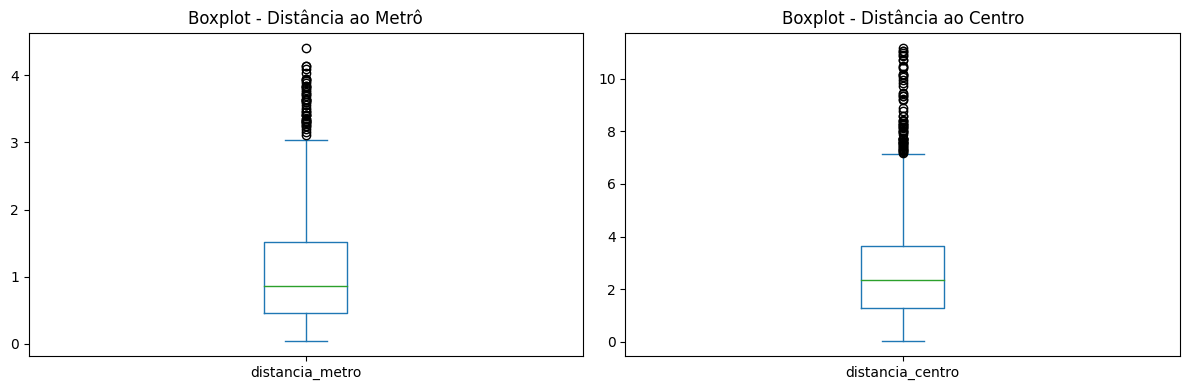

In [ ]:
# Criar a figura com duas áreas de plotagem
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plotar o boxplot da coluna "distancia_metro" no primeiro subplot
df_final.plot.box(column="distancia_metro", ax=axes[0])
axes[0].set_title('Boxplot - Distância ao Metrô')
# Plotar o boxplot da coluna "distancia_centro" no segundo subplot
df_final.plot.box(column="distancia_centro", ax=axes[1])
axes[1].set_title('Boxplot - Distância ao Centro')
# Ajustar o espaçamento entre os subplots
plt.tight_layout()
# Exibir a figura com os gráficos lado a lado
plt.show()

In [ ]:
# Contagem de registros de quantos imóveis são comerciais e familiares:
df_final.groupby(['comerc-familiar']).size()

comerc-familiar
COMERCIAL    127
FAMILIAR     976
dtype: int64

In [ ]:
# Percentuais (comerciais x familiares)
porcentagem_com_fam = round((df_final['comerc-familiar'].value_counts() / len(df_final)) * 100, 0)
print(porcentagem_com_fam)

FAMILIAR    88.00
COMERCIAL   12.00
Name: comerc-familiar, dtype: float64


In [ ]:
# Contagem de registros de quantos imóveis são oferecidos, por tipo de imóvel:
df_final.groupby(['tipo_quarto']).size()

tipo_quarto
DOMICÍLIO COMPLETO      538
QUARTO COMPARTILHADO      6
QUARTO PRIVADO          559
dtype: int64

In [ ]:
# Percentuais por tipo de quarto
porcentagem_tipo = round((df_final['tipo_quarto'].value_counts() / len(df_final)) * 100, 0)
print(porcentagem_tipo)

QUARTO PRIVADO         51.00
DOMICÍLIO COMPLETO     49.00
QUARTO COMPARTILHADO    1.00
Name: tipo_quarto, dtype: float64


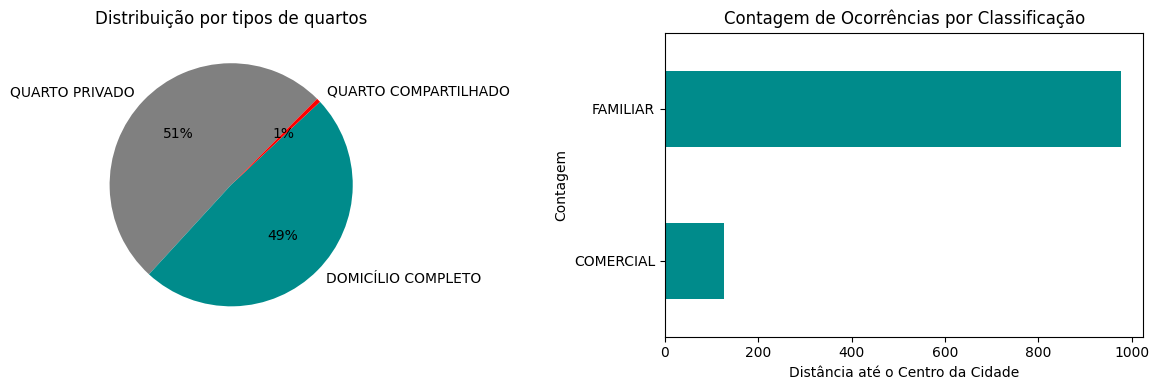

In [ ]:
# Gráfico de setores
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
colors = ['gray', 'DarkCyan', 'red']
# Plotar o gráfico de setores no primeiro subplot
df_final.groupby(['tipo_quarto'],dropna=False).size().sort_values(ascending=False).plot(kind='pie',
                                                                                  ax=axes[0],
                                                                                  ylabel=' ',
                                                                                  autopct='%1.0f%%',
                                                                                  startangle=45,
                                                                                  colors=colors)
axes[0].set_title('Distribuição por tipos de quartos')
# Plotar o gráfico de barras horizontal no segundo subplot
df_final.groupby(['comerc-familiar']).size().plot.barh(ax=axes[1], color=['darkcyan'])
axes[1].set_xlabel('Distância até o Centro da Cidade')
axes[1].set_ylabel('Contagem')
axes[1].set_title('Contagem de Ocorrências por Classificação')
# Ajustar o espaçamento entre os subplots
plt.tight_layout()
# Exibir a figura com os gráficos lado a lado
plt.show()

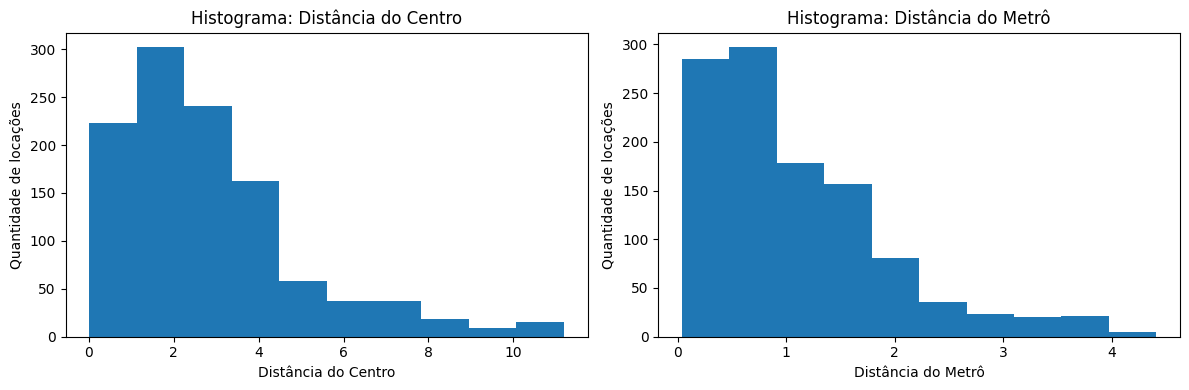

In [ ]:
# Criar a figura com duas áreas de plotagem
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plotar o histograma da coluna "distancia_centro" no primeiro subplot
axes[0].hist(df['distancia_centro'], bins=10)  # Ajuste o número de bins conforme necessário
axes[0].set_xlabel('Distância do Centro')
axes[0].set_ylabel('Quantidade de locações')
axes[0].set_title('Histograma: Distância do Centro')
# Plotar o histograma da coluna "distancia_metro" no segundo subplot
axes[1].hist(df['distancia_metro'], bins=10)  # Ajuste o número de bins conforme necessário
axes[1].set_xlabel('Distância do Metrô')
axes[1].set_ylabel('Quantidade de locações')
axes[1].set_title('Histograma: Distância do Metrô')
# Ajustar o espaçamento entre os subplots
plt.tight_layout()
# Exibir a figura com os histogramas lado a lado
plt.show()

In [ ]:
df_final

,preco_total,tipo_quarto,satisfacao,compartilhado,comerc-familiar,capacidade,distancia_centro,distancia_metro,longitude,latitude,faixa_centro,faixa_metro
0,194.03,QUARTO PRIVADO,93.00,FALSO,FAMILIAR,2.00,5.02,2.54,4.91,52.42,"(4, 6]","(2, 3]"
1,344.25,QUARTO PRIVADO,85.00,FALSO,FAMILIAR,4.00,0.49,0.24,4.90,52.37,"(0, 2]","(0, 1]"
2,264.10,QUARTO PRIVADO,87.00,FALSO,COMERCIAL,2.00,5.75,3.65,4.98,52.36,"(4, 6]","(3, 4]"
3,433.53,QUARTO PRIVADO,90.00,FALSO,COMERCIAL,4.00,0.38,0.44,4.89,52.38,"(0, 2]","(0, 1]"
4,485.55,QUARTO PRIVADO,98.00,FALSO,FAMILIAR,2.00,0.54,0.32,4.90,52.38,"(0, 2]","(0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.12,DOMICÍLIO COMPLETO,100.00,FALSO,FAMILIAR,2.00,2.38,1.44,4.86,52.38,"(2, 4]","(1, 2]"
1099,233.64,QUARTO PRIVADO,90.00,FALSO,FAMILIAR,2.00,4.72,0.32,4.84,52.35,"(4, 6]","(0, 1]"
1100,317.06,QUARTO PRIVADO,92.00,FALSO,FAMILIAR,2.00,0.60,0.75,4.89,52.38,"(0, 2]","(0, 1]"
1101,1812.86,DOMICÍLIO COMPLETO,84.00,FALSO,FAMILIAR,4.00,1.94,0.39,4.91,52.36,"(0, 2]","(0, 1]"


# **Conclusões Finais**

Mediante o levantamento dos dados fornecidos, conclue-se que há uma concentração de oferta de imóveis em áreas próximas ao centro da cidade e à estação do metrô mais próxima, além de um divisão quase igualitária entre modelos de quartos privados ou compartilhados, o que pode sugerir que a demanda é grande pela locação, não importando o modelo e a quantidade de quartos, mas sim sua localização.

Abaixo, respondemos às perguntas feitas no início do projeto:




1. **Qual o percentual de quartos oferecidos por tipo?**
  
   Conforme levantamento, dos 1103 quartos verificados, 559 deles (51%) são quartos privados e outros 538 (49%) são quartos completos, restando apenas 6 quartos (1%) na condição de quarto compartilhado.
  

    >   quarto_privado         51.00 %
    >   quarto_completo        49.00 %
    >   quarto compartilhado    1.00 %  
    >   TOTAL                 100.00 %

    >   quarto_compartilhado         6
    >   quarto_completo            538
    >   quarto_privado             559
    >   TOTAL                     1103

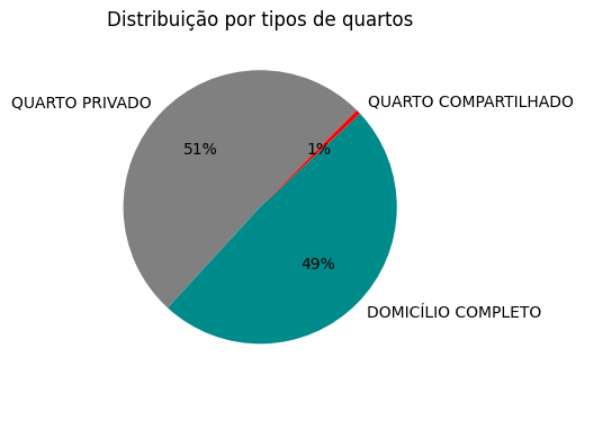






2. **Quantos quartos são para uso familiar e comercial?**

  Foram computados 976 imóveis (88%) sendo do tipo comercial e os 127 restantes (12%) pertencentes ao grupo de imóveis familiares.


    >   comercial              88.00 %
    >   familiar               12.00 %  
    >   TOTAL                 100.00 %

    >   comercial                  976
    >   familiar                   127
    >   quarto_privado            1103

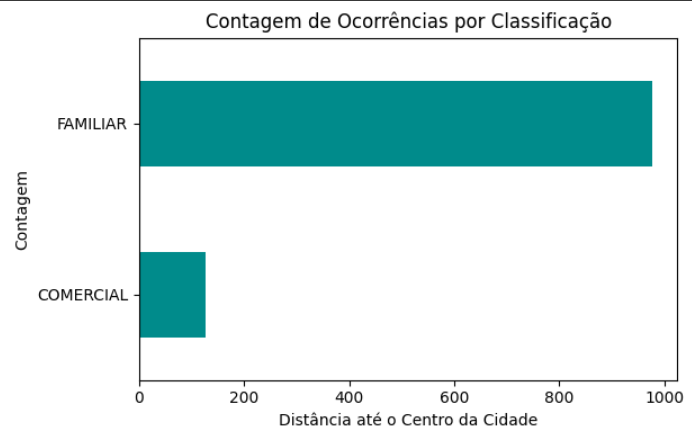

3. **Qual a distribuição entre os quartos mais próximos do centro da cidade e do metrô?**

  Através do levantamento efetuado, percebe-se uma maior distribuição dos quartos em uma área de até 4 km do centro da cidade e de até aproximadamente 2 km da estação de metrô mais próxima, o que pode ser um fator bastante relevante para os futuros locatários.
  
  
  
  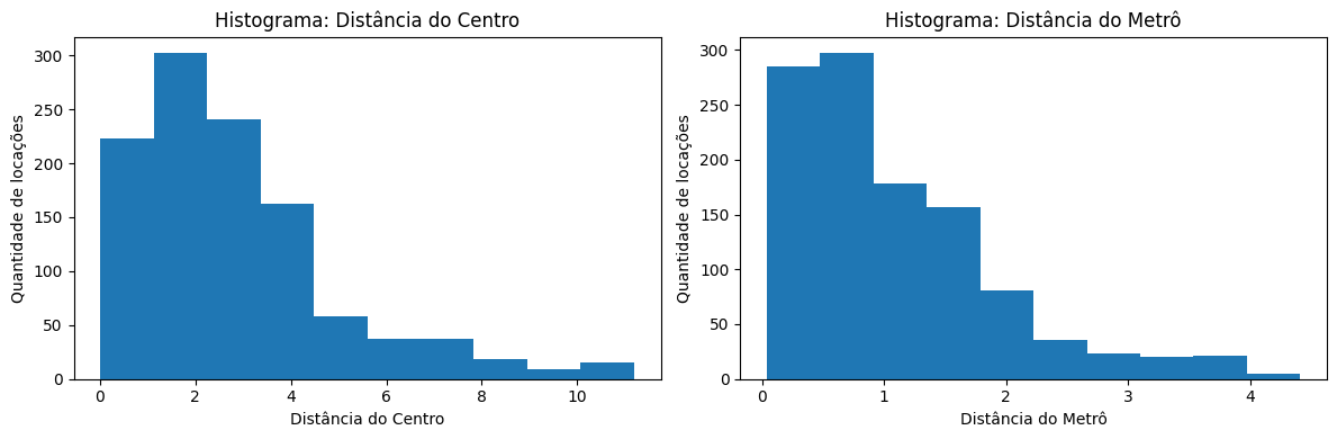.



4. **Existe uma relação clara entre proximidade do centro ou do metrô e o tipo de imóvel?**

  Pelos levantamentos efetuados, fica evidenciado que há uma distribuição bem maior de quartos (de todos os tipos e modelos) em uma curta distância do centro da cidade ou da estação de metrô mais próxima, o que pode indicar uma estratégia visando ofertar mais comodidade aos ocupantes e gerar consequentemente uma maior procura pelos mesmos e aumentar a taxa de ocupação.


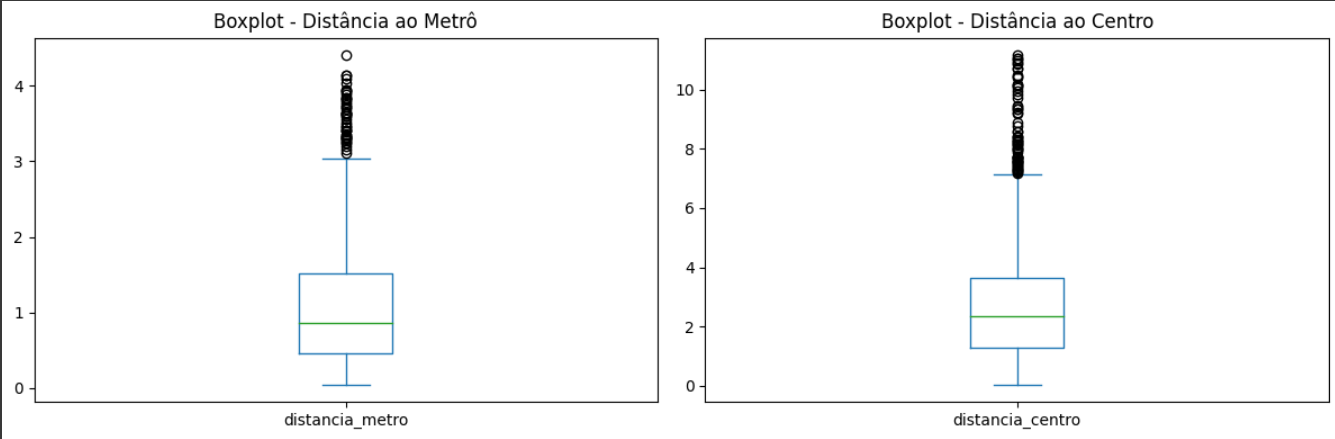